In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import read_csv
import math
import seaborn as sns
#from google.colab import drive
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
#drive.mount('/content/drive')

In [2]:
#pip install QKeras

In [3]:
df1 = pd.read_csv('/home/jieun201/sept27_tryKeras/InputTrainSet.csv')
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.778870
1,0.0,0.0,0.0,0.0,6.0,7.0,9.0,3.0,0.0,0.0,0.0,0.0,0.0,0.834873
2,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,2.631550
3,0.0,0.0,0.0,0.0,0.0,10.0,19.0,9.0,0.0,0.0,0.0,0.0,0.0,8.079170
4,0.0,0.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-7.075810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429745,0.0,0.0,0.0,2.0,5.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.777170
429746,0.0,0.0,0.0,0.0,0.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,-1.324640
429747,0.0,0.0,0.0,0.0,0.0,16.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,4.885720
429748,0.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.984120


In [4]:
df2 = pd.read_csv('/home/jieun201/sept27_tryKeras/labelsTrain.csv')
df2

,pt
0,0
1,0
2,0
3,0
4,1
...,...
429745,0
429746,0
429747,0
429748,1


In [5]:
df3 = pd.read_csv('/home/jieun201/sept27_tryKeras/InputTestSet.csv')
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,y-local
0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-7.65045
1,0.0,0.0,0.0,0.0,0.0,1.0,9.0,5.0,0.0,0.0,0.0,0.0,0.0,5.58730
2,0.0,0.0,0.0,2.0,5.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.31692
3,0.0,0.0,0.0,3.0,6.0,6.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,-1.29760
4,0.0,0.0,2.0,4.0,4.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.27107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107431,0.0,0.0,0.0,3.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.08619
107432,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.81045
107433,0.0,0.0,7.0,19.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.77811
107434,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.78435


In [6]:
df4 = pd.read_csv('/home/jieun201/sept27_tryKeras/labelsTest.csv')
df4

,pt
0,1
1,1
2,1
3,0
4,1
...,...
107431,1
107432,0
107433,0
107434,1


In [7]:
X_train = df1.values
X_test = df3.values

y_train = df2.values
y_test = df4.values
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 0)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(429750, 14) (107436, 14) (429750, 1) (107436, 1)


In [8]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [10]:
X_test

array([[-0.08461813, -0.16315037,  0.19857922, ..., -0.06289045,
        -0.05426783, -1.70711068],
       [-0.08461813, -0.16315037, -0.39849222, ..., -0.06289045,
        -0.05426783,  1.23015188],
       [-0.08461813, -0.16315037, -0.39849222, ..., -0.06289045,
        -0.05426783, -0.74556394],
       ...,
       [-0.08461813, -0.16315037,  3.78100788, ..., -0.06289045,
        -0.05426783,  1.05060449],
       [-0.08461813, -0.16315037, -0.39849222, ..., -0.06289045,
        -0.05426783,  1.71764505],
       [-0.08461813, -0.16315037, -0.39849222, ..., -0.06289045,
        -0.05426783, -0.79080858]])

In [11]:
from tensorflow.keras.layers import Input, Activation
#from qkeras import quantized bits
#from qkeras import QDense, QActivation
from qkeras import *

In [12]:
def CreateQModel(shape, nb_classes):
    x = x_in = Input(shape)
    x = QDense(32,
        kernel_quantizer=quantized_bits(2,0,alpha=1), bias_quantizer=quantized_bits(2,0,alpha=1),
        name="dense1")(x)
    x = keras.layers.BatchNormalization()(x)
    x = QActivation("quantized_relu(4,0)", name="relu-1")(x)
    x = QDense(64,
        kernel_quantizer=quantized_bits(2,0,alpha=1), bias_quantizer=quantized_bits(2,0,alpha=1),
        name="dense12")(x)
    x = keras.layers.BatchNormalization()(x)
    x = QActivation("quantized_relu(4,0)", name="relu-2")(x)
    x = QDense(1, kernel_quantizer=quantized_bits(2,0,alpha=1), bias_quantizer=quantized_bits(2,0,alpha=1),
        name="dense2")(x)
    x = keras.layers.BatchNormalization()(x)
    x = QActivation("quantized_sigmoid(4,0)", name="sig-1")(x)
    model = Model(inputs=x_in, outputs=x)
    return model

In [13]:
model=CreateQModel(X_train.shape[1:], y_train.shape[-1])
model.compile(optimizer=Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

2022-09-28 18:07:04.292230: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-28 18:07:04.329310: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-28 18:07:04.329625: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-28 18:07:04.330839: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [14]:
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)

history = model.fit(X_train,
                    y_train,
                    callbacks=[es],
                    epochs=200, 
                    batch_size=512,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/200
 42/672 [>.............................] - ETA: 2s - loss: 1.6175 - accuracy: 0.5513

2022-09-28 18:07:08.644472: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


672/672 [==============================] - 5s 5ms/step - loss: 1.0160 - accuracy: 0.6228 - val_loss: 0.7629 - val_accuracy: 0.6602
Epoch 2/200
672/672 [==============================] - 3s 4ms/step - loss: 0.6792 - accuracy: 0.6712 - val_loss: 0.6324 - val_accuracy: 0.6694
Epoch 3/200
672/672 [==============================] - 3s 5ms/step - loss: 0.6238 - accuracy: 0.6883 - val_loss: 0.6024 - val_accuracy: 0.7015
Epoch 4/200
672/672 [==============================] - 3s 4ms/step - loss: 0.6160 - accuracy: 0.6955 - val_loss: 0.6173 - val_accuracy: 0.6924
Epoch 5/200
672/672 [==============================] - 3s 4ms/step - loss: 0.6095 - accuracy: 0.7028 - val_loss: 0.6061 - val_accuracy: 0.7084
Epoch 6/200
672/672 [==============================] - 3s 4ms/step - loss: 0.6100 - accuracy: 0.7072 - val_loss: 0.6153 - val_accuracy: 0.7115
Epoch 7/200
672/672 [==============================] - 3s 4ms/step - loss: 0.6040 - accuracy: 0.7120 - val_loss: 0.5932 - val_accuracy: 0.7168
Epoch 8/200

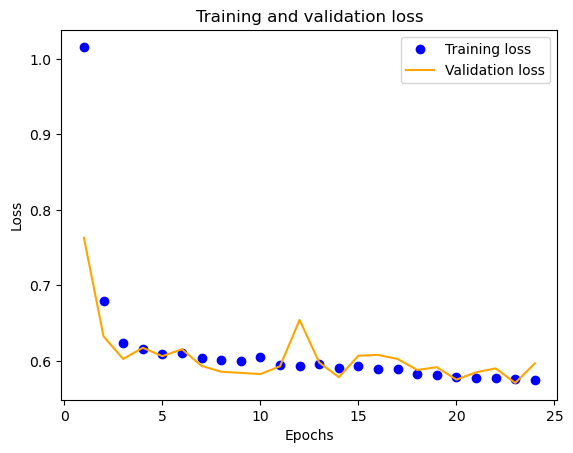

In [15]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1) 
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss.png')

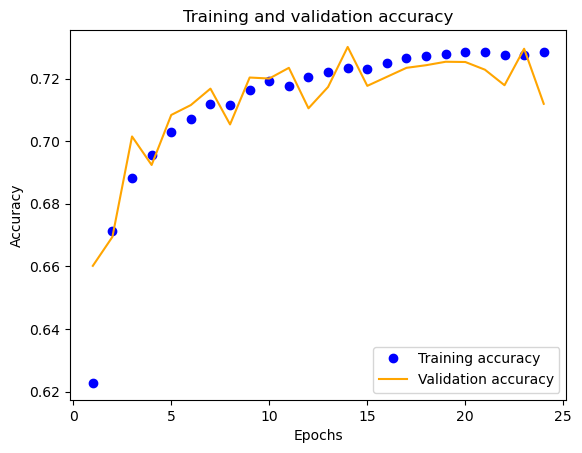

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

np.max(val_acc)
plt.savefig('accuracyDropout0.2.png')
plt.show()

In [17]:
model.predict(X_test) 
np.round(model.predict(X_test),0) 
preds = np.round(model.predict(X_test),0)
#print(confusion_matrix(y_test, preds)) # order matters! (actual, predicted)
#print(classification_report(y_test, preds))

In [18]:
predictionsFiles = np.round(model.predict(X_test),0)

In [19]:
pd.DataFrame(predictionsFiles).to_csv("predictionsFilesDropout0.2.csv",header='predict', index=False)

In [20]:
pd.DataFrame(y_test).to_csv("trueDropout0.2.csv",header='true', index=False)